In [293]:
import pandas as pd
import numpy as np
import seaborn as sns

# Assignment 2: Voting Classifiers and Random Forests

In this project, a *voting classifier* will be examined with the *Diagnostic Wisconsin Breast Cancer Database* in order to investigate effective models for malignant tumour detection. We will be examining the use of a voting classifier, with three inner models: Logistic Regression, Random Forest Classifier and a SVC Classifier.

# Voting Classifier: The *Diagnostic Wisconsin Breast Cancer Database*

## Data Preparation


In [294]:
data = pd.read_csv('wdbc.data', header=None)

# Column 0 is the ID, which is not need for classification
# Column 1 is the diagnosis, needed as the label of the classification
# 2 - 11 are mean values
# 12 - 21 are standard error
# 22 - 31 are worst

# Dropping the ID column
data.drop(columns=[0], inplace=True)

# Naming the columns
data.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
               'smoothness_mean','compactness_mean','concavity_mean','concave_points_mean',
               'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se',
               'area_se','smoothness_se','compactness_se','concavity_se','concave_points_se',
               'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
               'area_worst','smoothness_worst','compactness_worst','concavity_worst',
               'concave_points_worst','symmetry_worst','fractal_dimension_worst']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [295]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

labels = data.iloc[:, 0].values

labels = pd.DataFrame(labels, columns=["diagnosis"])

print("-------- Labels head (5) --------")

print(labels.head(5))

-------- Labels head (5) --------
  diagnosis
0         M
1         M
2         M
3         M
4         M


In [296]:

enc = OrdinalEncoder(categories=[["B", "M"]])
labels_encoded = enc.fit_transform(labels)
labels_encoded = np.reshape(labels_encoded, -1)

all_data = data.iloc[:, 1:31].values

print("-------- Unique encoded values --------")
print(np.unique(labels_encoded))

print("-------- Encoded Labels counts --------")
print(np.unique(labels_encoded, return_counts=True))

-------- Unique encoded values --------
[0. 1.]
-------- Encoded Labels counts --------
(array([0., 1.]), array([357, 212]))


In [297]:

X_train, X_test, y_train, y_test = train_test_split(all_data, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [298]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [299]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a classification model by printing precision, recall, and F1-scores,
    and displaying the confusion matrix.
    
    Parameters:
        model: A trained scikit-learn classification model.
        X_test: Test features.
        y_test: True test labels.
    """
    # Predict the labels
    y_pred = model.predict(X_test)
    
    # (a) Create a table of precision, recall, and F1-scores
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    # (b) Display a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    return report_df


## Logistic Regression

-------- Linear classifier score --------
0.9385964912280702


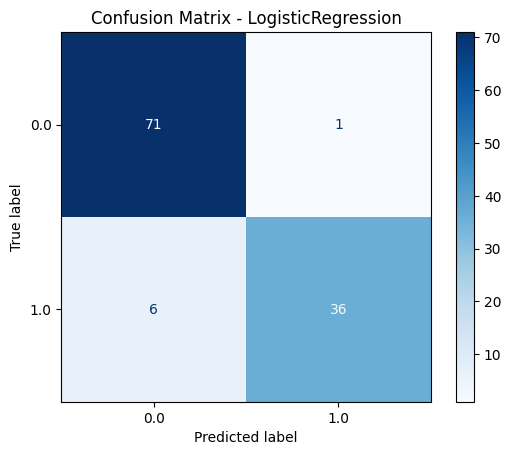

,precision,recall,f1-score,support
0.0,0.922078,0.986111,0.953020,72.000000
1.0,0.972973,0.857143,0.911392,42.000000
accuracy,0.938596,0.938596,0.938596,0.938596
macro avg,0.947525,0.921627,0.932206,114.000000
weighted avg,0.940829,0.938596,0.937684,114.000000


In [300]:
logistic_clf = LogisticRegression(random_state=42, max_iter=10000)
logistic_clf.fit(X_train, y_train)

print("-------- Linear classifier score --------")
print(logistic_clf.score(X_test, y_test))

logistic_df = evaluate_model(logistic_clf, X_test, y_test)
logistic_df

## Random Forest Classifier

-------- Random forest classifier score --------
0.9736842105263158


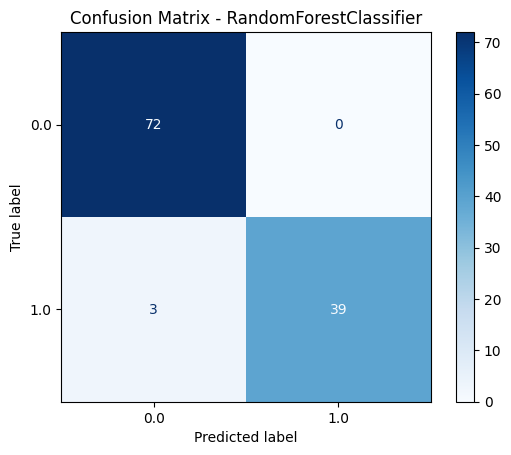

,precision,recall,f1-score,support
0.0,0.960000,1.000000,0.979592,72.000000
1.0,1.000000,0.928571,0.962963,42.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.980000,0.964286,0.971277,114.000000
weighted avg,0.974737,0.973684,0.973465,114.000000


In [301]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf_clf.fit(X_train, y_train)

print("-------- Random forest classifier score --------")
print(rf_clf.score(X_test, y_test))


rf_df = evaluate_model(rf_clf, X_test, y_test)
rf_df

## SVC Classifier

-------- SVC classifier score --------
0.9210526315789473


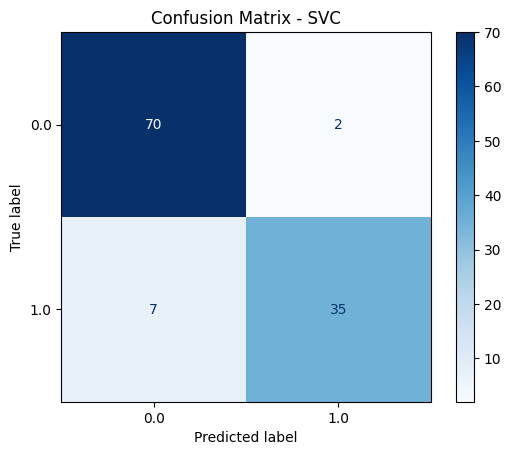

,precision,recall,f1-score,support
0.0,0.909091,0.972222,0.939597,72.000000
1.0,0.945946,0.833333,0.886076,42.000000
accuracy,0.921053,0.921053,0.921053,0.921053
macro avg,0.927518,0.902778,0.912837,114.000000
weighted avg,0.922669,0.921053,0.919879,114.000000


In [302]:
svc_clf = SVC(random_state=42, kernel='linear') 
svc_clf.fit(X_train, y_train)

print("-------- SVC classifier score --------")
print(svc_clf.score(X_test, y_test))

svc_df = evaluate_model(svc_clf, X_test, y_test)
svc_df


## Voting Classifier

-------- Voting classifier score --------
0.9385964912280702


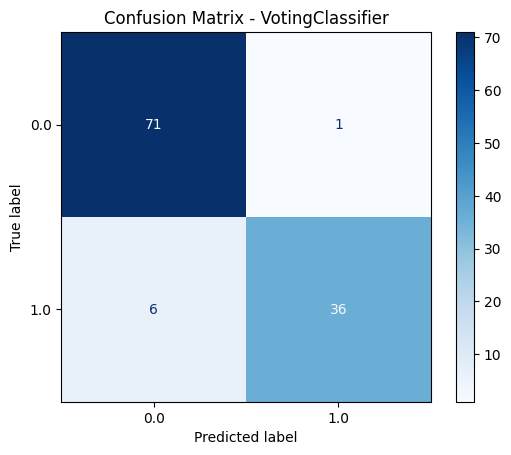

,precision,recall,f1-score,support
0.0,0.922078,0.986111,0.953020,72.000000
1.0,0.972973,0.857143,0.911392,42.000000
accuracy,0.938596,0.938596,0.938596,0.938596
macro avg,0.947525,0.921627,0.932206,114.000000
weighted avg,0.940829,0.938596,0.937684,114.000000


In [303]:
voting_clf = VotingClassifier(
    estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=10000)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)),
    ('svc', SVC(random_state=42, kernel='linear', probability=True)),
    ],
    voting='soft',
)

voting_clf.fit(X_train, y_train)
print("-------- Voting classifier score --------")
print(voting_clf.score(X_test, y_test))

voting_df = evaluate_model(voting_clf, X_test, y_test)
voting_df

In [304]:

def plot_classification_metrics_across_models(report_dfs, model_labels=None):
    """
    Plots precision, recall, and f1-score for each class across multiple models.

    Parameters:
        report_dfs (list of pd.DataFrame): Each DataFrame is a classification report.
        model_labels (list of str): Labels for each model.
    """

    if model_labels is None:
        model_labels = [f"Model {i}" for i in range(len(report_dfs))]

    metrics = ['precision', 'recall', 'f1-score']
    classes = report_dfs[0].index.tolist()  # Assuming all reports have same index

    for metric in metrics:
        plt.figure(figsize=(10, 5))

        for model_df, label in zip(report_dfs, model_labels):
            plt.plot(classes, model_df[metric], marker='o', label=label, alpha=0.7)
        
        plt.title(f"{metric.capitalize()} across models")
        plt.xlabel("Class / Average")
        plt.ylabel(metric.capitalize())
        plt.ylim(0.8, 1)
        plt.legend()
        plt.grid(True)
        plt.show()


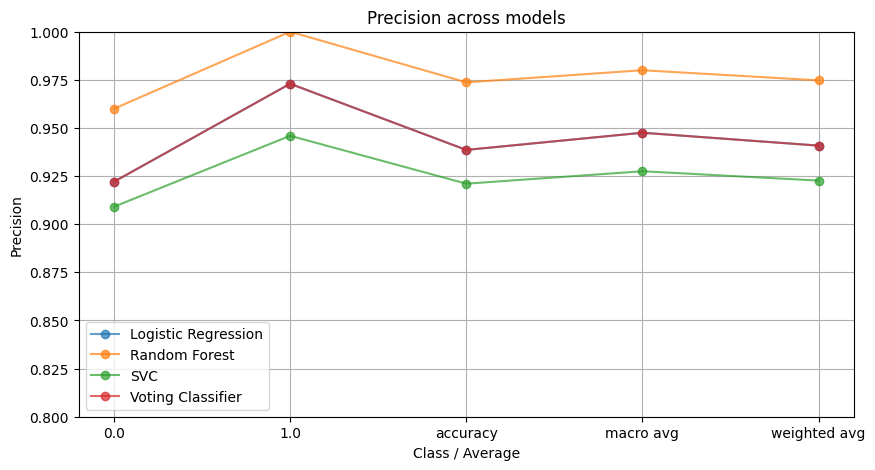

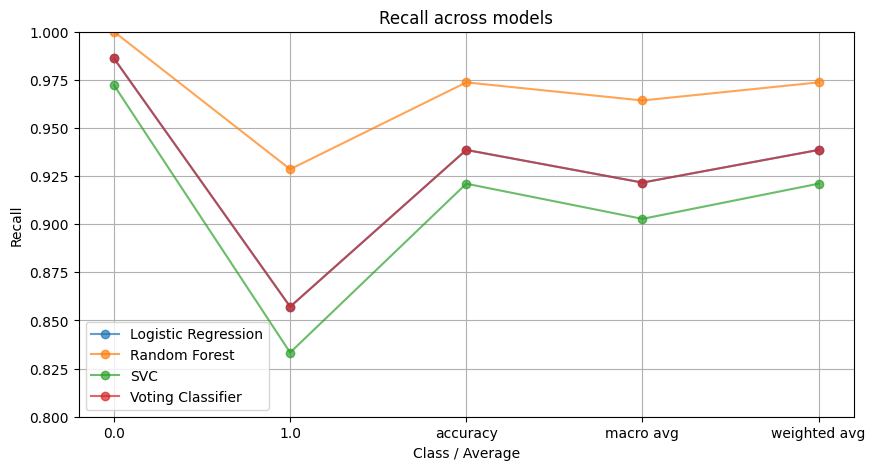

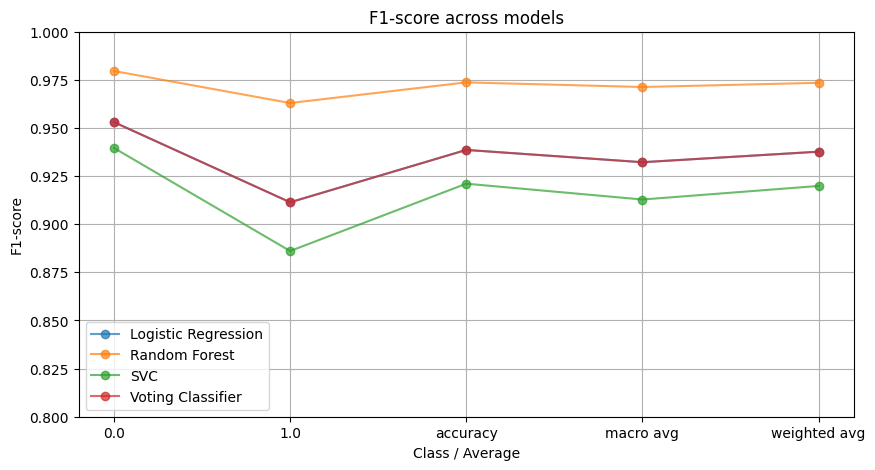

In [305]:
plot_classification_metrics_across_models([logistic_df, rf_df, svc_df, voting_df], model_labels=["Logistic Regression", "Random Forest", "SVC", "Voting Classifier"])

## Evaluation

1. How do the models compare to each other? Which model performs best? Is this what you expected?

The best performing model across the board was the Random Forest Classifier, likely due to its robustness and high accuracy. In the results graphs, it may appear that Logistic Regression is not apparent, however it is actually identical to the Voting Classifier. This is because the Logistic Regression model produces very high and low confidence values due to it's sigmoid classification model, causing it to have the greatest influence on the Voting Classifier's predictions. Thus, it produces the same results.

2. What are the advantages and disadvantages of using a voting classifier instead of just using one of the
base models?

The Voting Classifier can be a useful tool in reducing overfitting and robustness. By including a soft voting classification style it will take an average of the model's and use the highest average as its prediction, meaning that it has the classification power of three models. However, the selection of the model's is essential. In this case study, the Logistic Regression overpowered other model voting results, due to its sigmoid function. A Logistic Regression will produce very high and low results, inflating the averages of voting predictions. Thus, as mentioned prior, a voting classifier will heavily favor Logistic Regression results. I believe that model selection is essential, and that a Logistic Regression Model is not suitable for a Voting Classifier,





# Random Forest Classifier and Face Recognition

## Dataset Preparation


The original *Labeled faces in the wild* dataset produced by the University of Massachusetts, is a dataset of 13233 images with 5749. In this report, we will be using sklearn's version of the dataset. This dataset contains 1288 samples of seven different faces, those being:


1. Ariel Sharon
2. Colin Powell
3. Donal Rumsfeld
4. George W Bush
5. Gerhard Schroeder
6. Hugo Chavez
7. Tony Blair

In [323]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5)

Each instance in the dataset, is an individual image in a specific format.

1. The **data** attribute contains the dataset in a format in which each sample is an unravelled instance of an 62*47 image, each instance thus containing an array of length 2914.

2. The **images** attribute contains the dataset in a format in which each image is a 62*47 image.

3. The **target** attribute contains the label of each images, with an index correlating to a name.


In [324]:

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names

print(f"Data Shape: {lfw_people.data[0].shape}")
print(f"Image Shape: {lfw_people.images[0].shape}")


Data Shape: (2914,)
Image Shape: (62, 47)


We can then load the dataset with the *data* attribute, giving us a dataset with *2914* features, with each feature corresponding to a given pixel.

In [325]:
n_features = X.shape[1]
n_features

2914

There are seven classes, with each class corresponds to a target name.

In [326]:
print(f"Target: {np.unique(lfw_people.target)}")
print(f"Names: {lfw_people.target_names}")

Target: [0 1 2 3 4 5 6]
Names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


We can also see the distribution of target names. In this dataset, there is an imbalance in the data, with a high quantity of images labelled with *George W Bush*. 

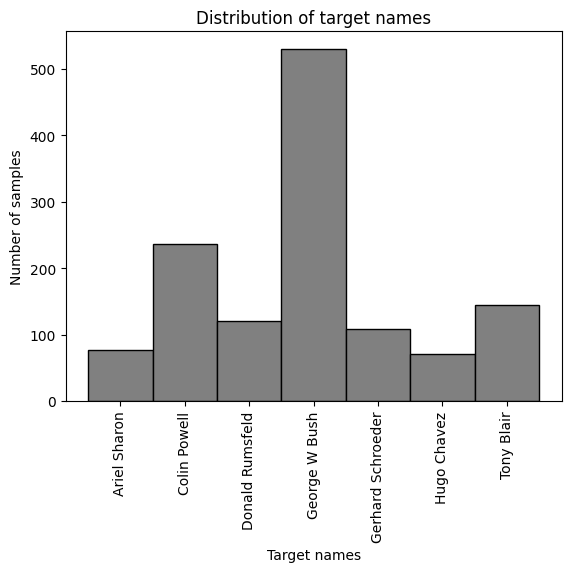

In [327]:
import matplotlib.pyplot as plt

plt.hist(lfw_people.target, bins=np.arange(len(target_names) + 1) - 0.5, color='gray', edgecolor='black')
plt.xticks(np.arange(len(target_names)), target_names, rotation=90)
plt.xlabel('Target names')
plt.ylabel('Number of samples')
plt.title('Distribution of target names')
plt.show()

We can then split the data with scikit's train_test_split. We must stratify the data to ensure that the training and test data have equal proportions of each class.

In [328]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1030, 2914), (258, 2914), (1030,), (258,))

We can thus visualise the images with matplotlib.

### Example Training Image

(np.float64(-0.5), np.float64(46.5), np.float64(61.5), np.float64(-0.5))

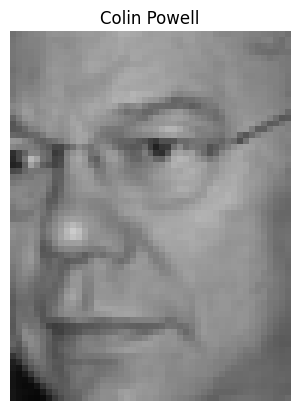

In [329]:
import cv2
import matplotlib.pyplot as plt
idx = np.random.randint(0, len(x_train))
train_img = x_train[idx].reshape(h, w)  
label_idx = y_train[idx] 
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

plt.title(f"{target_names[label_idx]}")
plt.imshow(train_img)
plt.axis('off')

### Example test image

(np.float64(-0.5), np.float64(46.5), np.float64(61.5), np.float64(-0.5))

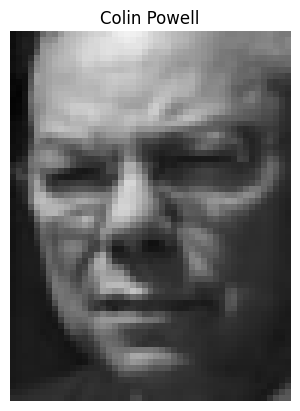

In [330]:
import cv2

idx = np.random.randint(0, len(x_test))
label_idx = y_test[idx]
test_img = x_test[idx].reshape(h, w)   
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

plt.imshow(test_img)
plt.title(f"{target_names[label_idx]}")
plt.axis('off')

## Basic Model

As per the project specification, a Random forest classifier with 1000 estimators will be used to develop a classification model.

In [331]:
import time
rf_clf = RandomForestClassifier(n_estimators=1000)

start_time = time.time()
rf_clf.fit(x_train, y_train)
end_time = time.time()

rf_time = end_time - start_time
print(f"Time taken to create the model: {rf_time} seconds")

Time taken to create the model: 39.10231852531433 seconds


We can examine the models performance by using sklearn's *classification_report*.

In [332]:
from sklearn.metrics import classification_report

# Performance on test data
y_pred = rf_clf.predict(x_test)
rf_clfreport = classification_report(y_test, y_pred, output_dict=True)
rf_clfreport_df = pd.DataFrame(rf_clfreport).transpose()

rf_clfreport_df

,precision,recall,f1-score,support
0,1.000000,0.062500,0.117647,16.000000
1,0.745098,0.808511,0.775510,47.000000
2,1.000000,0.333333,0.500000,24.000000
3,0.596491,0.962264,0.736462,106.000000
4,0.833333,0.227273,0.357143,22.000000
5,0.833333,0.357143,0.500000,14.000000
6,0.666667,0.344828,0.454545,29.000000
accuracy,0.655039,0.655039,0.655039,0.655039
macro avg,0.810703,0.442264,0.491615,258.000000
weighted avg,0.727058,0.655039,0.606338,258.000000


As the report shows, it has quite high variability depending on the label. 
We can visualise the estimations with a confusion matrix

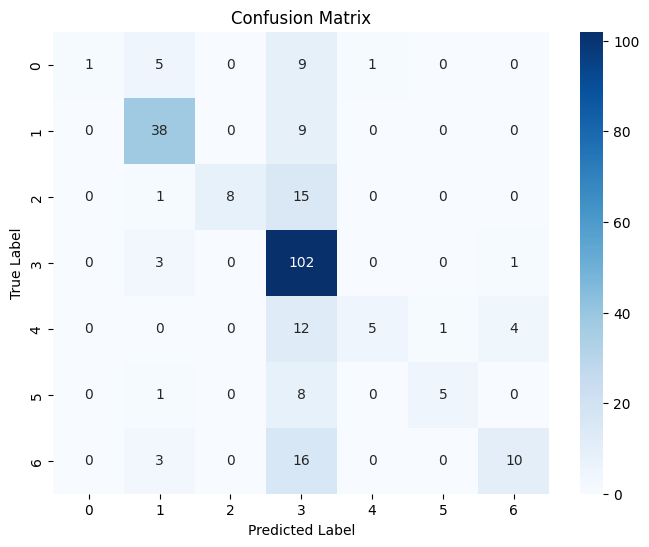

In [333]:
from sklearn.metrics import confusion_matrix

cf_data = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_data, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can clearly see that the model's label 3 has has some relatively high variability.

We can investigate the impact that each feature has on the performance, or more simply, the feature importances of the classifier.

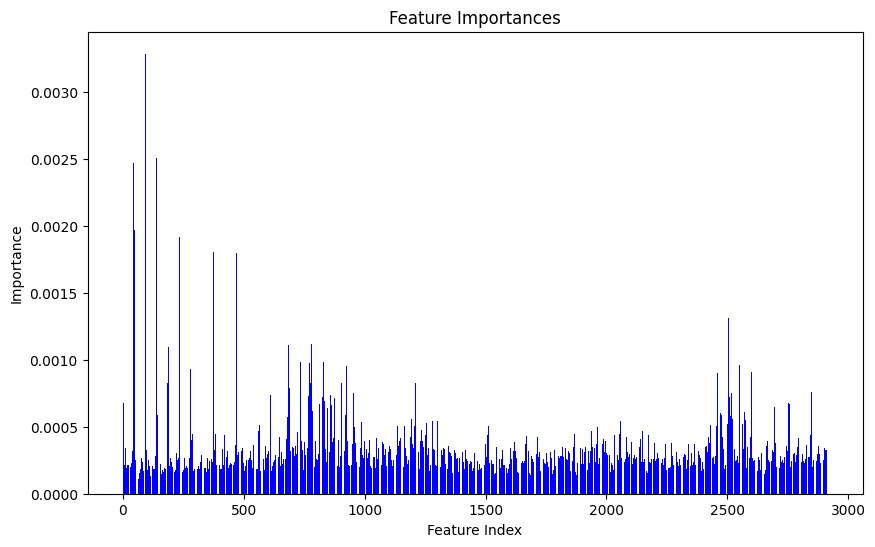

In [334]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_clf.feature_importances_)), rf_clf.feature_importances_, color='blue', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

As the plot shows, there is a group of features which have significantly greater importance. This is likely due to a defining characteristic that is present in the first few rows of the images, as the greatest features are in the first hundred features, which could be the hairline or hairstyle. There are also a few important features at the bottom of the image which are likely caused by high variation in lower locations, potentially the nose, mouth or eyes.

## Principal Component Analysis

In order to reduce the dimensionality of the proble, we can implemet *principal component analysis*. Principal component analysis reduces components to **principal components**, which are the most influential features of the problem. By implementing a PCA with sklearn, we can reduce the dimensionality significantly. Sklearn's PCA has an attribute called *explained_variance_ratio*, which determines the amount of variance in the original dataset which is explained by a given principal component. In this dataset, it is very imbalanced, as we saw in the original data visualisation. PCA will exaggerate this imbalance in the training, as the majority of the variance will come from within the imbalanced class.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=42)
pca_data = pca.fit_transform(lfw_people.data)

print(f"New Feature Count: {pca_data[0].shape[0]}")

print("------Explained Variance Ratio------")
print(f"10 components: \n {pca.explained_variance_ratio_[:10]}")  
print(f"Sum of first 10 components: {np.sum(pca.explained_variance_ratio_[:10])}")  # Sum of all components

New Feature Count: 150
------Explained Variance Ratio------
10 components: 
 [0.20304109 0.13773687 0.06835183 0.05631959 0.04803609 0.02840886
 0.02328441 0.02014366 0.01908491 0.01795693]
Sum of first 15 components: 0.6832621097564697


The PCA has reduced our features to 150, retaining around 93% of all variance.

### EigenFaces

In computer vision, more specifically the domain of facial recognition, the principal component analysis reduces the instances into what is known as *eigenfaces*, a dimensionally reduced image. Eigenfaces are used for more effective estimation as it contains *high* impact features, due to the nature of PCA.

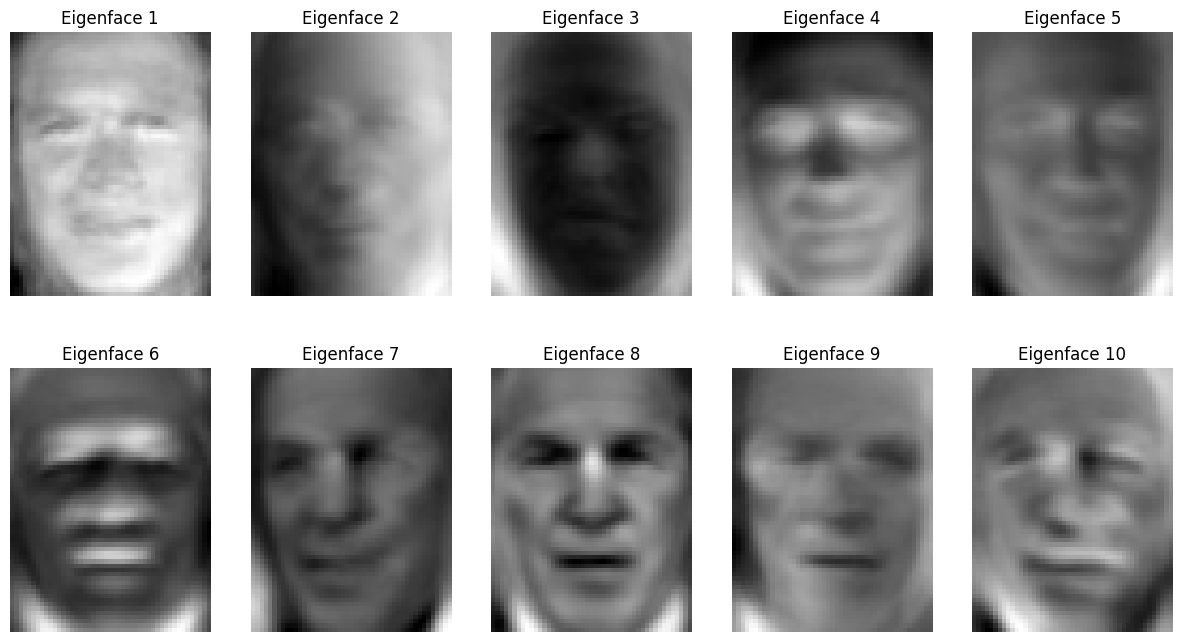

In [336]:
eigenfaces = pca.components_[:10]
eigenfaces = eigenfaces.reshape((10, h, w))

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')

In [337]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_data, y, test_size=0.2, random_state=42, stratify=y)
x_train_pca.shape, x_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((1030, 150), (258, 150), (1030,), (258,))

### PCA Model

We can evaluate the model's performance on the PCA dataset.

In [338]:
rfpca_clf = RandomForestClassifier(n_estimators=1000)

start_time = time.time()
rfpca_clf.fit(x_train_pca, y_train)
end_time = time.time()

rfpca_time = end_time - start_time
print(f"Time taken to create the model: {rfpca_time} seconds")

Time taken to create the model: 12.000852346420288 seconds


In [339]:
y_pred = rfpca_clf.predict(x_test_pca)
print(np.unique(y_pred, return_counts=True))
pcareport = classification_report(y_test_pca, y_pred, output_dict=True, zero_division=0)

pca_report_df = pd.DataFrame(pcareport).transpose()
pca_report_df


(array([1, 2, 3, 4, 6]), array([ 25,   3, 226,   2,   2]))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,16.000000
1,0.960000,0.510638,0.666667,47.000000
2,1.000000,0.125000,0.222222,24.000000
3,0.464602,0.990566,0.632530,106.000000
4,1.000000,0.090909,0.166667,22.000000
5,0.000000,0.000000,0.000000,14.000000
6,1.000000,0.068966,0.129032,29.000000
accuracy,0.527132,0.527132,0.527132,0.527132
macro avg,0.632086,0.255154,0.259588,258.000000
weighted avg,0.656464,0.527132,0.430711,258.000000


Text(0.5, 1.0, 'Confusion Matrix')

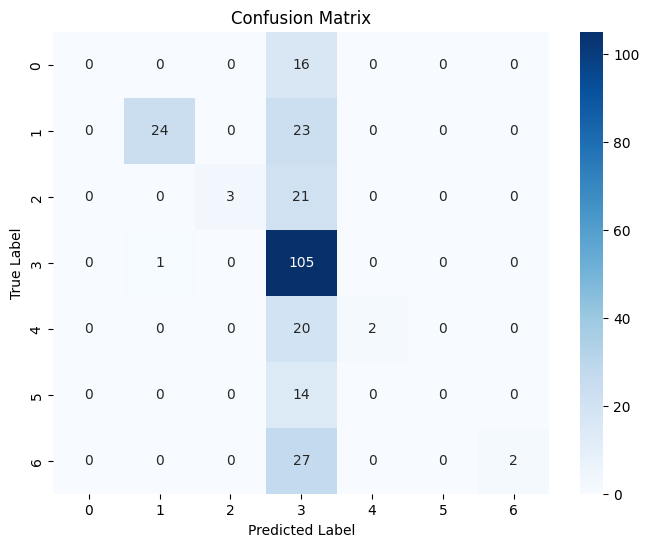

In [340]:
cf_data = confusion_matrix(y_test_pca, y_pred)
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_data, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

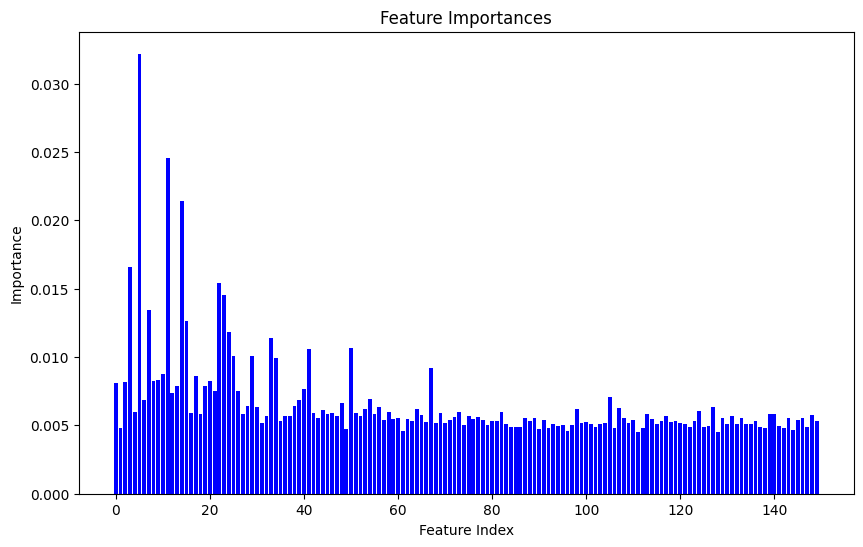

In [341]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rfpca_clf.feature_importances_)), rfpca_clf.feature_importances_, color='blue', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [343]:
print(f"Time taken to create the model without PCA: {rf_time} seconds")
print(f"Time taken to create the model with PCA: {rfpca_time} seconds")

Time taken to create the model without PCA: 39.10231852531433 seconds
Time taken to create the model with PCA: 12.000852346420288 seconds


## Evaluation

The PCA model has signficantly worse performance than the base model. The PCA model has an incredibly high bias towards predicting the label *3*, or George W. Bush. I believed that the PCA would perform similarly, if not better than the base model due to its focus on high impact features, but the class imbalance has the PCA model overloading these features. 

However, a large bonus of the PCA model is that it trained *significantly* faster, being around ~4 times faster. This is a signifcant bonus, as it can allow the training of a model on larger datasets with effective results. It is essential that any class imbalances are accounted for otherwise it will not be effective.

The Feature importance of the PCA model has a much higher bias towards the initial features, which is as expected, as the initial features contain the most variance. This is indeed what I expected, as we can see in the *explained variance ratio* that the intial 10 features contain around 60% of the total variance in the dataset of 150 features.